In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

In [2]:
cities=pd.read_csv("data/cities.csv")
providers=pd.read_csv("data/providers.csv")
stations=pd.read_csv("data/stations.csv")
tickets=pd.read_csv("data/ticket_data.csv")

In [3]:
print(tickets)

            id  company  o_station  d_station            departure_ts  \
0      6795025     8385        NaN        NaN  2017-10-13 14:00:00+00   
1      6795026        9       63.0     1044.0  2017-10-13 13:05:00+00   
2      6795027     8377     5905.0     6495.0  2017-10-13 13:27:00+00   
3      6795028     8377     5905.0     6495.0  2017-10-13 13:27:00+00   
4      6795029     8381     5905.0     6495.0  2017-10-13 21:46:00+00   
5      6795030     8385        NaN        NaN  2017-10-06 05:30:00+00   
6      6795031     8385        NaN        NaN  2017-10-06 07:00:42+00   
7      6795032     8385        NaN        NaN  2017-10-06 07:10:00+00   
8      6795033     8385        NaN        NaN  2017-10-06 10:00:00+00   
9      6795034     8385        NaN        NaN  2017-10-06 10:00:00+00   
10     6795035     8385        NaN        NaN  2017-10-06 12:40:00+00   
11     6795036     8385        NaN        NaN  2017-10-06 13:00:00+00   
12     6795037     8385        NaN        NaN  2017

In [24]:
#Fonction générique pour compter le nombre d'éléments dans une liste
def count(char,list):
    res=0
    for i in list:
        if i==char:
            res+=1
    return(res)

## Exploration des données

In [4]:
#Cette méthode permet de vérifier le type d'une colonne d'un dataframe. Si on a plusieurs types dans une même colonne,
#Un message d'erreur apparaît.
def typecheck(dataframe,colname):
    column=dataframe[colname]
    type_column=type(column[0])
    check="clear"
    for i in range(len(column)):
        if not isinstance(column[i],type_column):
            print("Problème: une valeur de la colonne "+colname+" est du type: "+str(type(column[i]))+"\n")
            check="err"
            break
    if check=="clear":
        print("Le type de la colonne "+colname+" est: "+str(type_column)+"\n")
    return(check)

In [5]:
print(cities["unique_name"][0])

padua


In [6]:
typecheck(cities,"unique_name")

Problème: une valeur de la colonne unique_name est du type: <class 'float'>



'err'

In [7]:
#Compte le nombre de valeurs manquantes pour une colonne
def countMissingValues(dataframe,colname):
    column=dataframe[colname]
    count_mv=0
    for value in column:
        if isinstance(value,(int,float)):
            if np.isnan(value):
                count_mv+=1
        if isinstance(value,str):
            if value=="":
                count_mv+=1
    print("Le nombre d'observations manquantes pour la colonne "+colname+" est: "+str(count_mv))
    return count_mv

In [8]:
#Cette fonction renvoie les lignes des valeurs manquantes pour pouvoir vérifier si ces données sont manquantes
#en raison d'une erreur informatique ou humaine ou si il s'agit simpement d'information non disponible.
def getMissingValueLine(dataframe,colname):
    MissingValues=[]
    column=dataframe[colname]
    line=-1
    for value in column:
        line+=1
        if isinstance(value,(int,float)):
            if np.isnan(value):
                MissingValues.append(line)
        if isinstance(value,str):
            if value=="":
                MissingValues.append(line)
    return(MissingValues)

In [9]:
#Pour chaque colonne d'un dataframe, cette fonction renvoie le type de données et 
#le nombre d'observations manquantes
def first_impression(dataframe):
    print("Nombre total d'observations: "+str(len(dataframe.iloc[:,0])))
    for colname in dataframe.columns:
        column=dataframe[colname]
        typecheck(dataframe,colname)
        countMissingValues(dataframe,colname)

In [10]:
first_impression(tickets)
#On remarque qu'il y a 41441 observations où l'on n'a pas d'informattions sur les stations

Nombre total d'observations: 74168
Le type de la colonne id est: <class 'numpy.int64'>

Le nombre d'observations manquantes pour la colonne id est: 0
Le type de la colonne company est: <class 'numpy.int64'>

Le nombre d'observations manquantes pour la colonne company est: 0
Le type de la colonne o_station est: <class 'numpy.float64'>

Le nombre d'observations manquantes pour la colonne o_station est: 41441
Le type de la colonne d_station est: <class 'numpy.float64'>

Le nombre d'observations manquantes pour la colonne d_station est: 41441
Le type de la colonne departure_ts est: <class 'str'>

Le nombre d'observations manquantes pour la colonne departure_ts est: 0
Le type de la colonne arrival_ts est: <class 'str'>

Le nombre d'observations manquantes pour la colonne arrival_ts est: 0
Le type de la colonne price_in_cents est: <class 'numpy.int64'>

Le nombre d'observations manquantes pour la colonne price_in_cents est: 0
Le type de la colonne search_ts est: <class 'str'>

Le nombre d'ob

In [11]:
first_impression(cities)
#On remarque qu'il manque une valeur pour la colonne "local_name"

Nombre total d'observations: 8040
Le type de la colonne id est: <class 'numpy.int64'>

Le nombre d'observations manquantes pour la colonne id est: 0
Le type de la colonne local_name est: <class 'str'>

Le nombre d'observations manquantes pour la colonne local_name est: 0
Problème: une valeur de la colonne unique_name est du type: <class 'float'>

Le nombre d'observations manquantes pour la colonne unique_name est: 1
Le type de la colonne latitude est: <class 'numpy.float64'>

Le nombre d'observations manquantes pour la colonne latitude est: 0
Le type de la colonne longitude est: <class 'numpy.float64'>

Le nombre d'observations manquantes pour la colonne longitude est: 0
Le type de la colonne population est: <class 'numpy.float64'>

Le nombre d'observations manquantes pour la colonne population est: 7671


In [12]:
print(getMissingValueLine(cities,"unique_name"))
print(cities.iloc[6866,:])
#En y regardant de plus près, on voit que l'erreur vient du fait u'Hambourg est à la fois une ville et un lander

[6866]
id                              10244
local_name     , Hamburg, Deutschland
unique_name                       NaN
latitude                      39.6134
longitude                     2.88043
population                        NaN
Name: 6866, dtype: object


In [13]:
cities.loc[cities.id==10244,'local_name']="Hamburg, Hamburg, Deutschland"
cities.loc[cities.id==10244,'unique_name']="hamburg"
print(cities.iloc[6866,:])

id                                     10244
local_name     Hamburg, Hamburg, Deutschland
unique_name                          hamburg
latitude                             39.6134
longitude                            2.88043
population                               NaN
Name: 6866, dtype: object


In [14]:
first_impression(providers)

Nombre total d'observations: 227
Le type de la colonne id est: <class 'numpy.int64'>

Le nombre d'observations manquantes pour la colonne id est: 0
Le type de la colonne company_id est: <class 'numpy.int64'>

Le nombre d'observations manquantes pour la colonne company_id est: 0
Problème: une valeur de la colonne provider_id est du type: <class 'str'>

Le nombre d'observations manquantes pour la colonne provider_id est: 14
Le type de la colonne name est: <class 'str'>

Le nombre d'observations manquantes pour la colonne name est: 0
Le type de la colonne fullname est: <class 'str'>

Le nombre d'observations manquantes pour la colonne fullname est: 0
Problème: une valeur de la colonne has_wifi est du type: <class 'float'>

Le nombre d'observations manquantes pour la colonne has_wifi est: 3
Problème: une valeur de la colonne has_plug est du type: <class 'float'>

Le nombre d'observations manquantes pour la colonne has_plug est: 3
Problème: une valeur de la colonne has_adjustable_seats est 

In [15]:
print(getMissingValueLine(providers,"has_wifi"))

[212, 224, 225]


In [16]:
providers.iloc[212,:]

id                          8374
company_id                    20
provider_id                  NaN
name                    transdev
fullname                Transdev
has_wifi                     NaN
has_plug                     NaN
has_adjustable_seats         NaN
has_bicycle                  NaN
transport_type               bus
Name: 212, dtype: object

In [17]:
providers.iloc[224,:]

id                       8387
company_id                 30
provider_id               NaN
name                    vatry
fullname                Vatry
has_wifi                  NaN
has_plug                  NaN
has_adjustable_seats      NaN
has_bicycle               NaN
transport_type            bus
Name: 224, dtype: object

In [18]:
providers.iloc[225,:]

id                         8388
company_id                   40
provider_id                 NaN
name                    beauval
fullname                Beauval
has_wifi                    NaN
has_plug                    NaN
has_adjustable_seats        NaN
has_bicycle                 NaN
transport_type              bus
Name: 225, dtype: object

In [19]:
first_impression(stations)
#ras

Nombre total d'observations: 11035
Le type de la colonne id est: <class 'numpy.int64'>

Le nombre d'observations manquantes pour la colonne id est: 0
Le type de la colonne unique_name est: <class 'str'>

Le nombre d'observations manquantes pour la colonne unique_name est: 0
Le type de la colonne latitude est: <class 'numpy.float64'>

Le nombre d'observations manquantes pour la colonne latitude est: 0
Le type de la colonne longitude est: <class 'numpy.float64'>

Le nombre d'observations manquantes pour la colonne longitude est: 0


In [20]:
print("prix minimum: "+str(np.round(min(tickets['price_in_cents'])/100,2))+"€")
print("prix maximum: "+str(np.round(max(tickets['price_in_cents'])/100,2))+"€")
print("prix moyen: "+str(np.round(np.mean(tickets['price_in_cents'])/100,2))+"€")

prix minimum: 3.0€
prix maximum: 385.5€
prix moyen: 43.83€


## La durée des trajets

In [48]:
ts=tickets['departure_ts'][0]
datetime.datetime.strptime(ts,"%Y-%m-%d %H:%M:%S%z").timestamp()
#On remarque que le format de la timezone n'est pas régulier: il est au format +HH au lieu de +HHMM

ValueError: time data '2017-10-13 14:00:00+00' does not match format '%Y-%m-%d %H:%M:%S%z'

In [45]:
departure_ts=tickets['departure_ts']
arrival_ts=tickets['arrival_ts']

In [46]:
tzLocDep=[]
for dep in departure_ts:
    tzLocDep.append(dep.find('+'))

In [47]:
tzLocArr=[]
for arr in arrival_ts:
    tzLocArr.append(arr.find('+'))

In [25]:
print(count(19,tzLocDep))

74168


In [26]:
print(count(19,tzLocArr))
#Fort heureusement, comme tous les ts sont au même format, la fonction pour régulariser les ts est très simple.

74168


In [27]:

def regularize_TzFormat(TsList):
    regList=[]
    tsInt=0
    for ts in TsList:
        tsInt=datetime.datetime.strptime(ts+"00","%Y-%m-%d %H:%M:%S%z").timestamp()
        regList.append(tsInt)
    return(regList)

In [28]:
arrival=regularize_TzFormat(tickets['arrival_ts'])
departure=regularize_TzFormat(tickets['departure_ts'])
travelTime_Seconds=np.subtract(arrival,departure)

In [29]:
travelTime=pd.DataFrame({"travelTime_seconds":travelTime_Seconds})
tickets=tickets.join(travelTime)

In [30]:
print("temps de trajet minimal: "+str(min(tickets['travelTime_seconds'])/60)+" minutes")
print("temps de trajet maximal: "+str(max(tickets['travelTime_seconds'])/60)+" minutes")
print("temps de trajet moyen: "+str(np.mean(tickets['travelTime_seconds'])/60)+" minutes")

temps de trajet minimal: 20.0 minutes
temps de trajet maximal: 29571.0 minutes
temps de trajet moyen: 424.6207933340524 minutes


In [33]:
tickets.iloc[np.argmin(arrival),:]

id                                       6797687
company                                     8385
o_station                                    NaN
d_station                                    NaN
departure_ts              2017-09-08 06:00:00+00
arrival_ts                2017-09-08 12:10:00+00
price_in_cents                              3800
search_ts             2017-10-02 05:40:59.343+00
middle_stations                              NaN
other_companies                              NaN
o_city                                       504
d_city                                        76
travelTime_seconds                         22200
Name: 2662, dtype: object

In [34]:
tickets.iloc[np.argmax(arrival),:]
#Les données s'étalent entre le 8 Septembre 2017 et le 30 Mars 2018

id                                       6803756
company                                     8371
o_station                                    470
d_station                                    848
departure_ts              2018-03-29 16:10:00+00
arrival_ts                2018-03-30 05:45:00+00
price_in_cents                              2700
search_ts             2017-10-04 06:56:37.579+00
middle_stations                        {527,527}
other_companies                           {8371}
o_city                                       455
d_city                                      2181
travelTime_seconds                         48900
Name: 8731, dtype: object

## La distance parcourue

In [35]:
import geopy.distance

In [36]:
#Quand c'est possible, on préfère prendre les coordonnées géographiques des stations. Sinon, on utilisera les 
#coordonnées de la ville de départ et de la ville d'arrivée.

#La fonction ComputeDistance récupère les coordonées de la station de départ ainsi que de la station d'arrivée 
#lorsque c'est possible. Sinon, ce sont les coordonnées des villes qui sont utilisées.
def ComputeDistance(row_id):
    
    if not np.isnan(tickets.loc[tickets['id']==row_id,"o_station"].values[0]):
        OriginId=tickets.loc[tickets['id']==row_id,"o_station"].values[0]
        DestinationId=tickets.loc[tickets['id']==row_id,"d_station"].values[0]
                
        OriginLat=float(stations.loc[stations['id']==OriginId,'latitude'].values[0])
        OriginLong=float(stations.loc[stations['id']==OriginId,'longitude'].values[0])
        
        DestinationLat=float(stations.loc[stations['id']==DestinationId,'latitude'].values[0])
        DestinationLong=float(stations.loc[stations['id']==DestinationId,'longitude'].values[0])

        
    else:
        OriginId=tickets.loc[tickets['id']==row_id,"o_city"].values[0]
        DestinationId=tickets.loc[tickets['id']==row_id,"d_city"].values[0]
        
        OriginLat=float(cities.loc[cities['id']==OriginId,'latitude'].values[0])
        OriginLong=float(cities.loc[cities['id']==OriginId,'longitude'].values[0])


        
        DestinationLat=float(cities.loc[cities['id']==DestinationId,'latitude'].values[0])
        DestinationLong=float(cities.loc[cities['id']==DestinationId,'longitude'].values[0])
        
        
    OriginCoord=[OriginLat,OriginLong]
    DestinationCoord=[DestinationLat,DestinationLong]
    
    return(geopy.distance.distance(OriginCoord,DestinationCoord).km)

In [37]:
#Pour éviter de calculer deux fois une distance entre deux mêmes points, cette fonction enregistre les trajets 
#uniques passés (sinon le calcul de l'ensemble des distances prend un peu de temps...)
def getTicketDistance():
    pastTravels_stations={}
    pastTravels_cities={}
    ticketDistance=[]
    for ticket in tickets['id']:

        OriginId=tickets.loc[tickets['id']==ticket,"o_station"].values[0]
        DestinationId=tickets.loc[tickets['id']==ticket,"d_station"].values[0]
        #Si On a les infos dans la station, on utilise le dictionnaire des stations...
        if not np.isnan(tickets.loc[tickets['id']==ticket,"o_station"].values[0]):
            OriginId=tickets.loc[tickets['id']==ticket,"o_station"].values[0]
            DestinationId=tickets.loc[tickets['id']==ticket,"d_station"].values[0]
            
            if (OriginId,DestinationId) in pastTravels_stations.keys():
                ticketDistance.append(pastTravels_stations[(OriginId,DestinationId)])
            #Si le trajet est nouveau, on met à jour le dictionnaire des trajets passés
            else:
                td=ComputeDistance(ticket)
                pastTravels_stations[(OriginId,DestinationId)]=td
                ticketDistance.append(td)
        #... Sinon on utilise le dictionnaire des villes
        else:
            OriginId=tickets.loc[tickets['id']==ticket,"o_city"].values[0]
            DestinationId=tickets.loc[tickets['id']==ticket,"d_city"].values[0]
            
            if (OriginId,DestinationId) in pastTravels_cities.keys():
                ticketDistance.append(pastTravels_cities[(OriginId,DestinationId)])
            #Si le trajet est nouveau, on met à jour le dictionnaire des trajets passés
            else:
                td=ComputeDistance(ticket)
                pastTravels_cities[(OriginId,DestinationId)]=td
                ticketDistance.append(td)
    
    return(ticketDistance)

In [37]:
before=time.time()
ticketDistance=[ComputeDistance(row_id) for row_id in tickets['id']]
print(time.time()-before)

1093.533634185791


In [38]:
#Même si le gain de temps est non-négligeable, l'opération prend tout de même un petit moment
before=time.time()
ticketDistance=getTicketDistance()
print(time.time()-before)

818.4493267536163


In [39]:
travelDistance=pd.DataFrame({"travelDistance":ticketDistance})
tickets=tickets.join(travelDistance)

In [40]:
print(np.array(tickets.columns))

['id' 'company' 'o_station' 'd_station' 'departure_ts' 'arrival_ts'
 'price_in_cents' 'search_ts' 'middle_stations' 'other_companies' 'o_city'
 'd_city' 'travelTime_seconds' 'travelDistance']


In [41]:
tickets_0_200=tickets.loc[tickets.travelDistance<=200]
tickets_200_800=tickets.loc[(tickets.travelDistance>200)&(tickets.travelDistance<=800)]
tickets_800_2000=tickets.loc[(tickets.travelDistance>800)&(tickets.travelDistance<=2000)]
tickets_2000_plus=tickets.loc[tickets.travelDistance>2000]

In [42]:
print(len(tickets))
print(len(tickets_0_200))
print(len(tickets_200_800))
print(len(tickets_800_2000))
print(len(tickets_2000_plus))

74168
14225
58379
1564
0


In [43]:
#On a bien récupéré tous les tickets
14225+58379+1564

74168

In [44]:
print("Distance minimale: "+str(min(tickets['travelDistance']))+" Km")
print("Distance maximale: "+str(max(tickets['travelDistance']))+" Km")
print("Distance moyenne: "+str(np.mean(tickets['travelDistance']))+" Km")

Distance minimale: 16.60730555367227 Km
Distance maximale: 1870.4566741018598 Km
Distance moyenne: 362.6385870408489 Km


## Graphiques

### Prix/durée  moyen.ne du trajet en fonction de la distance 

In [182]:
#Pour calculer les moyennes en fonction de la distance, on divise l'échantillon en trois souus-dataframes 
#correspondant aux trois catégories de trajet.
total_mean=np.mean(tickets['price_in_cents'])/100
smallTrips_mean=np.mean(tickets_0_200['price_in_cents'])/100
mediumTrips_mean=np.mean(tickets_200_800['price_in_cents'])/100
longTrips_mean=np.mean(tickets_800_2000['price_in_cents'])/100

In [183]:
print(total_mean)
print(smallTrips_mean)
print(mediumTrips_mean)
print(longTrips_mean)

43.82711061374178
17.317044639718805
49.08272443858236
88.76842071611253


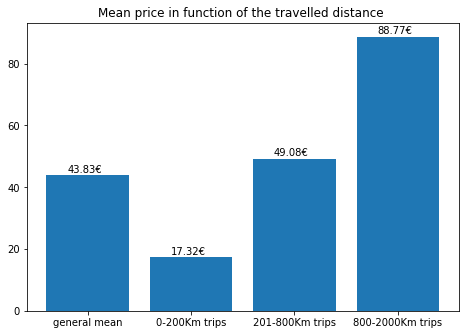

In [435]:
mean_prices={'general mean':total_mean,'0-200Km trips':smallTrips_mean,
             '201-800Km trips':mediumTrips_mean,'800-2000Km trips':longTrips_mean}

means=plt.figure()
ax=means.add_axes([0,0,1,1])
rects=ax.bar(list(mean_prices.keys()),list(mean_prices.values()))

##Rajoute les valeurs de chaque catégorie
col=0
for v in list(mean_prices.values()):
    ax.text(col-0.20,v+1,str(np.round(v,2))+"€")
    col+=1
plt.title("Mean price in function of the travelled distance ")
plt.show()

In [443]:
total_meanTravelTime=np.round(np.mean(tickets['travelTime_seconds'])/60)
smallTrips_meanTravelTime=np.round(np.mean(tickets_0_200['travelTime_seconds'])/60)
mediumTrips_meanTravelTime=np.round(np.mean(tickets_200_800['travelTime_seconds'])/60)
longTrips_meanTravelTime=np.round(np.mean(tickets_800_2000['travelTime_seconds'])/60)

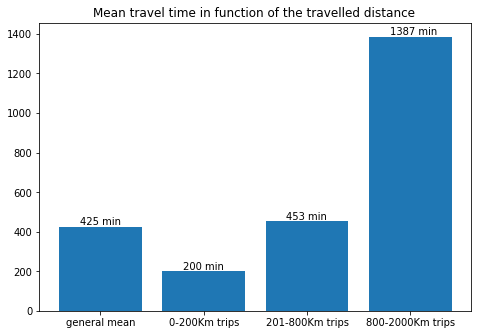

In [454]:
mean_travelTime={'general mean':total_meanTravelTime,'0-200Km trips':smallTrips_meanTravelTime,
             '201-800Km trips':mediumTrips_meanTravelTime,'800-2000Km trips':longTrips_meanTravelTime}

means=plt.figure()
ax=means.add_axes([0,0,1,1])
rects=ax.bar(list(mean_travelTime.keys()),list(mean_travelTime.values()))

##Rajoute les valeurs de chaque catégorie
col=0
for v in list(mean_travelTime.values()):
    ax.text(col-0.20,v+10,str(int(v))+" min ")
    col+=1
plt.title("Mean travel time in function of the travelled distance ")
plt.show()

### Prix/Durée moyen.ne du trajet en fonction du moyen de transport

In [237]:
#Pour se pencher sur le prix/temps de trajet en fonction du moyen de transport, on joint les tables
#tickets et providers.
ticketsProviders=tickets.merge(providers,left_on='company',right_on='id')

In [455]:
#On divise l'échantillon en 3 sous-échantillon en fonction du mode de transports utilisés
busTickets=ticketsProviders.loc[ticketsProviders['transport_type']=='bus']
trainTickets=ticketsProviders.loc[ticketsProviders['transport_type']=='train']
carTickets=ticketsProviders.loc[ticketsProviders['transport_type']=='carpooling']

In [239]:
print(len(ticketsProviders))
print(len(busTickets))
print(len(trainTickets))
print(len(carTickets))
print(len(busTickets)+len(carTickets)+len(trainTickets))
#On a bien récupéré tous les tickets de l'échantillon en les divisant en ces 3 catégories.
#On remarque que la taille de "carTickets" correspond au nombre d'observations où les informations
#sur les stations sont manquantes. Ceci nous donne la quasi-certitude que nous ne disposons pas les trajets
#en voiture n'ont pas de stations associées (ce qui est logique).

74168
13798
18929
41441
74168


In [240]:
busTrips_mean=np.mean(busTickets['price_in_cents'])/100
trainTrips_mean=np.mean(trainTickets['price_in_cents'])/100
carTrips_mean=np.mean(carTickets['price_in_cents'])/100

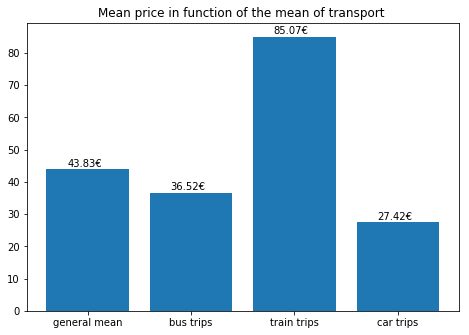

In [433]:
mean_prices={'general mean':total_mean,'bus trips':busTrips_mean,
             'train trips':trainTrips_mean,'car trips':carTrips_mean}

means=plt.figure()
ax=means.add_axes([0,0,1,1])
rects=ax.bar(list(mean_prices.keys()),list(mean_prices.values()))

##Rajoute les valeurs de chaque catégorie
col=0
for v in list(mean_prices.values()):
    ax.text(col-0.20,v+1,str(np.round(v,2))+"€")
    col+=1
plt.title("Mean price in function of the mean of transport ")
plt.show()

In [459]:
busTrips_meanTravelTime=np.round(np.mean(busTickets['travelTime_seconds'])/60)
trainTrips_meanTravelTime=np.round(np.mean(trainTickets['travelTime_seconds'])/60)
carTrips_meanTravelTime=np.round(np.mean(carTickets['travelTime_seconds'])/60)

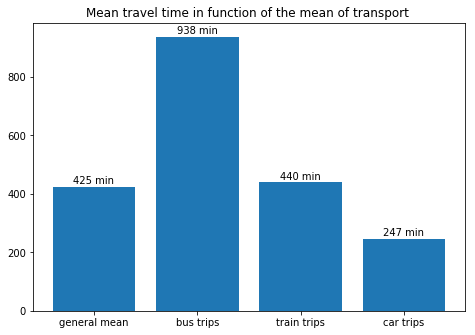

In [463]:
mean_travelTime={'general mean':total_meanTravelTime,'bus trips':busTrips_meanTravelTime,
             'train trips':trainTrips_meanTravelTime,'car trips':carTrips_meanTravelTime}

means=plt.figure()
ax=means.add_axes([0,0,1,1])
rects=ax.bar(list(mean_travelTime.keys()),list(mean_travelTime.values()))

##Rajoute les valeurs de chaque catégorie
col=0
for v in list(mean_travelTime.values()):
    ax.text(col-0.20,v+10,str(int(v))+" min")
    col+=1
plt.title("Mean travel time in function of the mean of transport ")
plt.show()

### Compagnies les plus "rentables" pour l'utilisateur

In [249]:
#Pour l'exercice, j'ai créé une troisième métrique pour les tickets, la "rentabilité" qui correspond au coût en 
#centimes d'euro par kilomètre parcouru d'un trajet.
rentability=[ticketsProviders['price_in_cents'][i]/ticketsProviders['travelDistance'][i] 
             for i in range(len(ticketsProviders))]

In [252]:
travelRentability=pd.DataFrame({"travelRentability":rentability})
ticketsProviders=ticketsProviders.join(travelRentability)

In [294]:
#Cette fonction prend en input un dataframe et renvoie la liste des couples (providers,rentabilité moyenne)
#pour l'ensemble des providers du dataframe.
def meanRentability_byProvider(dataframe):
    providers_list=[]
    rentability=[]
    for provider in set(dataframe['company']):
        providers_list.append(dataframe.loc[dataframe['company']==provider,'name'].values[0])
        rentability.append(np.mean(dataframe.loc[dataframe['company']==provider,'travelRentability'].values[0]))
    return(sorted(zip(rentability,providers_list)))

In [51]:
print(len(providers.loc[providers.transport_type=='bus']))
print(len(providers.loc[providers.transport_type=='train']))
print(len(providers.loc[(providers.transport_type!='bus')&(providers.transport_type!='train')]))

214
10
3


In [325]:
#On va regarder la rentabilité des compagnies en fonction de la distance et du type de transport. On met de côté 
# la catégorie "car" car il n'y a que 3 providers de covoiturage dans notre échantillon. Celà nous laisse donc 6
#cas de figures distincts à étudier.
tickets_bus_0_200=ticketsProviders.loc[(ticketsProviders['transport_type']=='bus')&
                                       (tickets.travelDistance<=200)]
tickets_bus_200_800=ticketsProviders.loc[(ticketsProviders['transport_type']=='bus')&
                                       ((tickets.travelDistance>200)&(tickets.travelDistance<=800))]
tickets_bus_800_2000=ticketsProviders.loc[(ticketsProviders['transport_type']=='bus')&
                                       ((tickets.travelDistance>800)&(tickets.travelDistance<=2000))]

tickets_train_0_200=ticketsProviders.loc[(ticketsProviders['transport_type']=='train')&
                                       (tickets.travelDistance<=200)]
tickets_train_200_800=ticketsProviders.loc[(ticketsProviders['transport_type']=='train')&
                                       ((tickets.travelDistance>200)&(tickets.travelDistance<=800))]
tickets_train_800_2000=ticketsProviders.loc[(ticketsProviders['transport_type']=='train')&
                                       ((tickets.travelDistance>800)&(tickets.travelDistance<=2000))]

In [326]:
rentability_bus_0_200=meanRentability_byProvider(tickets_bus_0_200)
rentability_bus_200_800=meanRentability_byProvider(tickets_bus_200_800)
rentability_bus_800_2000=meanRentability_byProvider(tickets_bus_800_2000)

rentability_train_0_200=meanRentability_byProvider(tickets_train_0_200)
rentability_train_200_800=meanRentability_byProvider(tickets_train_200_800)
rentability_train_800_2000=meanRentability_byProvider(tickets_train_800_2000)

In [327]:
values_bus0200=[bus[0] for bus in rentability_bus_0_200]
names_bus0200=[bus[1] for bus in rentability_bus_0_200]

values_bus200800=[bus[0] for bus in rentability_bus_200_800]
names_bus200800=[bus[1] for bus in rentability_bus_200_800]

values_bus8002000=[bus[0] for bus in rentability_bus_800_2000]
names_bus8002000=[bus[1] for bus in rentability_bus_800_2000]


values_train0200=[train[0] for train in rentability_train_0_200]
names_train0200=[train[1] for train in rentability_train_0_200]

values_train200800=[train[0] for train in rentability_train_200_800]
names_train200800=[train[1] for train in rentability_train_200_800]

values_train8002000=[train[0] for train in rentability_train_800_2000]
names_train8002000=[train[1] for train in rentability_train_800_2000]

In [345]:
# Fonction qui va nous servir à afficher la valeur des barres pour le barplot.
def autolabel(rects,ax):
    """Attach a text label above each bar, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

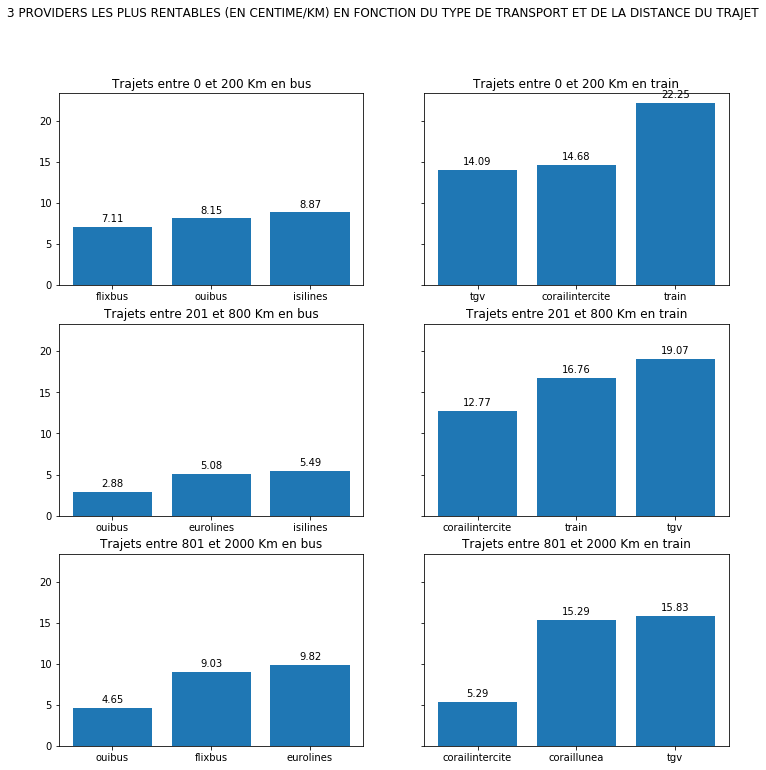

In [408]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12), sharey=True)
rec1=axs[0,0].bar(names_bus0200[0:3], values_bus0200[0:3])
autolabel(rec1,axs[0,0])
rec2=axs[0,1].bar(names_train0200[0:3], values_train0200[0:3])
autolabel(rec2,axs[0,1])

rec3=axs[1,0].bar(names_bus200800[0:3], values_bus200800[0:3])
autolabel(rec3,axs[1,0])
rec4=axs[1,1].bar(names_train200800[0:3], values_train200800[0:3])
autolabel(rec4,axs[1,1])

rec5=axs[2,0].bar(names_bus8002000[0:3], values_bus8002000[0:3])
autolabel(rec5,axs[2,0])
rec6=axs[2,1].bar(names_train8002000[0:3], values_train8002000[0:3])
autolabel(rec6,axs[2,1])

axs[0,0].set_title('Trajets entre 0 et 200 Km en bus')
axs[0,1].set_title('Trajets entre 0 et 200 Km en train')
axs[1,0].set_title('Trajets entre 201 et 800 Km en bus')
axs[1,1].set_title('Trajets entre 201 et 800 Km en train')
axs[2,0].set_title('Trajets entre 801 et 2000 Km en bus')
axs[2,1].set_title('Trajets entre 801 et 2000 Km en train')
fig.suptitle('3 PROVIDERS LES PLUS RENTABLES (EN CENTIME/KM) EN FONCTION DU TYPE DE TRANSPORT ET DE LA DISTANCE DU TRAJET')

plt.show()

### Répartition des voyages/commandes en fonction du jour de la semaine

In [386]:
#Fonction qui renvoie la liste des jours de la semaine et qui prend en input une liste de dates 
#(sous format String)
def getWeekDay(TsList):
    dayList=[]
    for ts in TsList:
        try:
            tsDay=datetime.datetime.strptime(ts+"00","%Y-%m-%d %H:%M:%S%z").strftime('%A')
        except:
                tsDay=datetime.datetime.strptime(ts[0:ts.find('.')]+ts[ts.find('+'):]+"00","%Y-%m-%d %H:%M:%S%z").strftime('%A')
        dayList.append(tsDay)
    return(dayList)

In [388]:
travel_weekday=getWeekDay(tickets['departure_ts'])
search_weekday=getWeekDay(tickets['search_ts'])

In [391]:
travelWeekday=pd.DataFrame({"travelWeekday":travel_weekday})
ticketsProviders=ticketsProviders.join(travelWeekday)

searchWeekday=pd.DataFrame({"searchWeekday":search_weekday})
ticketsProviders=ticketsProviders.join(searchWeekday)

In [405]:
travelWeekday_proportions=[count("Monday",travel_weekday),count("Tuesday",travel_weekday),
count("Wednesday",travel_weekday),count("Thursday",travel_weekday),count("Friday",travel_weekday),
count("Saturday",travel_weekday),count("Sunday",travel_weekday)]

searchWeekday_proportions=[count("Monday",search_weekday),count("Tuesday",search_weekday),
count("Wednesday",search_weekday),count("Thursday",search_weekday),count("Friday",search_weekday),
count("Saturday",search_weekday),count("Sunday",search_weekday)]

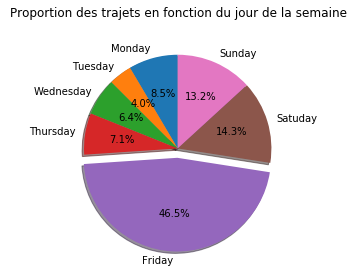

In [412]:
labels='Monday','Tuesday','Wednesday','Thursday','Friday','Satuday','Sunday'
props=travelWeekday_proportions
explode = (0, 0, 0, 0,0.1,0,0)

fig,ax=plt.subplots()
ax.pie(props, explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')

plt.title("Proportion des trajets en fonction du jour de la semaine",y=1.1)
plt.show()

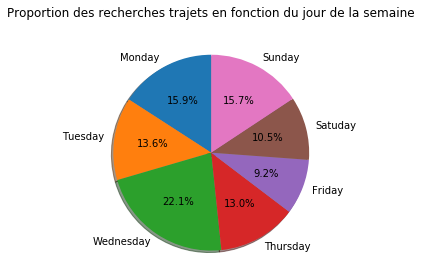

In [415]:
props=searchWeekday_proportions

fig,ax=plt.subplots()
ax.pie(props,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')

plt.title("Proportion des recherches trajets en fonction du jour de la semaine",y=1.1)
plt.show()